### Open tracking data file and parse raw protobuf data

In [1]:
# pandas, matplotlib, numpy, protobuf
import trackingDataPb_pb2

# open protobuf file
with open("Gang_1.pb", "rb") as f:
    # create tracking data object
    tracking_data = trackingDataPb_pb2.trackingData()
    
    # parse string from file
    tracking_data.ParseFromString(f.read())

type(tracking_data)

trackingDataPb_pb2.trackingData

### Check video metadata

In [2]:
tracking_data.videoMeta

frameRate: 29.833334
resX: 1280
resY: 720

### Check number of frames in video

In [3]:
len(tracking_data.frameData)

120

### How long is the video?

In [13]:
print(f"Video is {len(tracking_data.frameData) / tracking_data.videoMeta.frameRate:.2f} seconds long")

Video is 4.02 seconds long


### Which frame contains the first tracking data?

In [5]:

for i, frame in enumerate(tracking_data.frameData):
    if frame.poseData:
        print(i)
        break

10


### Draw a skeleton in frame 50

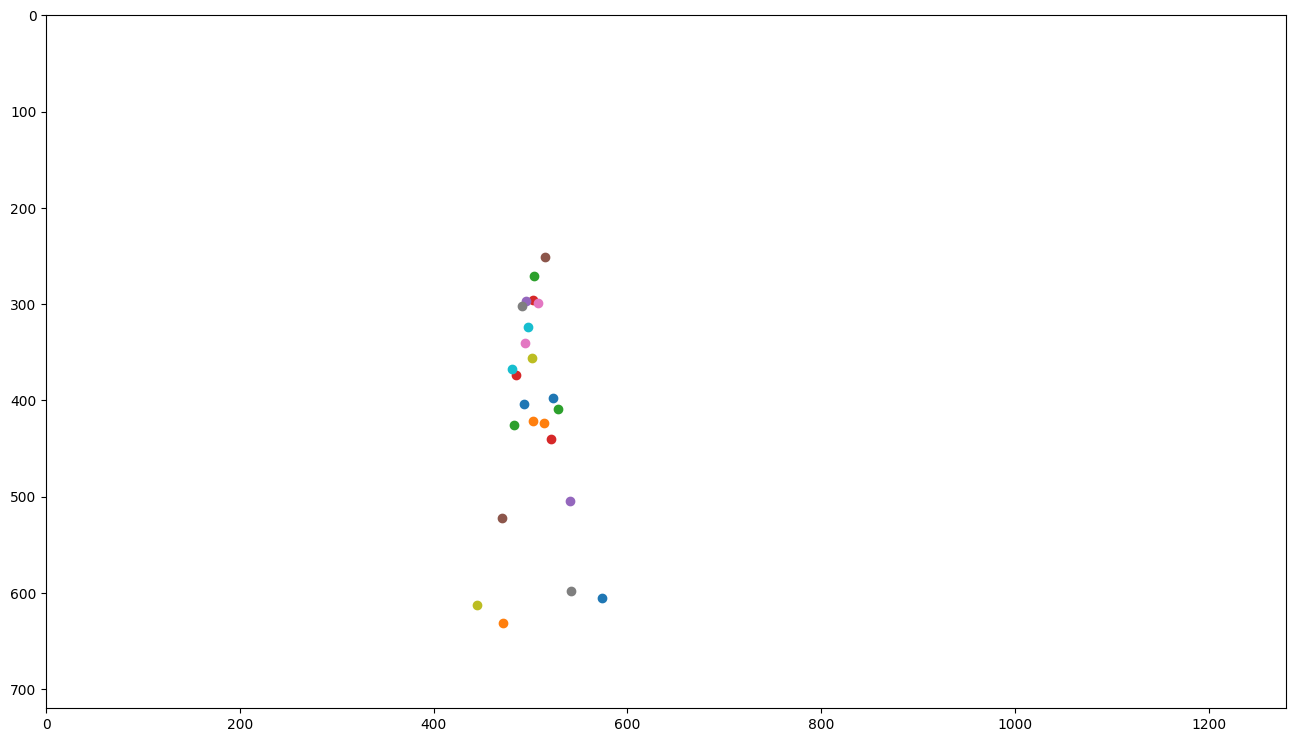

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(16, 9))

ax.set_xlim([0, 1280])
ax.set_ylim([720, 0])

for kp in tracking_data.frameData[50].poseData[0].keyPoints:
    ax.scatter(kp.posX, kp.posY)


### Parse tracking data as pandas dataframe

In [9]:
import pandas as pd

# initialize empty array
df = []

# for each frame in our tracking data
for frame in tracking_data.frameData:
    # for each pose in each frame
    for pose in frame.poseData:
        # for each keypoint in each pose
        for keypoint in pose.keyPoints:
            # add frame and keypoint information to array
            df.append([frame.index, pose.id, keypoint.type, keypoint.posX, keypoint.posY, keypoint.absPosX, keypoint.absPosY, keypoint.absPosZ])

df = pd.DataFrame(df, columns=["frame", "pose", "keypoint", "x", "y", "absX", "absY", "absZ"])
df

,frame,pose,keypoint,x,y,absX,absY,absZ
0,10,0,0,-34.276367,375.272125,-2458.729492,55.678486,5003.188477
1,10,0,1,-29.251953,398.332092,-2439.427246,139.716583,5000.884766
2,10,0,2,-27.242188,398.939209,-2441.875244,142.507233,5019.823242
3,10,0,3,-37.291016,343.869537,-2461.406250,-58.624901,4986.764160
4,10,0,4,-24.227539,493.565674,-2447.730225,492.342468,5056.616211
...,...,...,...,...,...,...,...,...
2467,112,0,19,1317.291016,378.223969,2757.573486,74.199486,5586.394043
2468,112,0,20,1262.357422,408.946167,2758.000000,216.933640,6079.987305
2469,112,0,21,1329.349609,422.260864,2814.405762,254.260742,5604.070312
2470,112,0,22,1260.012695,422.093384,2762.349121,276.704468,6112.461914


### Change data format to one row per frame and pose

In [10]:
dfp = df.pivot(index=["frame", "pose"], columns="keypoint", values=["x", "y", "absX", "absY", "absZ"])
dfp = dfp.swaplevel(axis=1)
dfp

,keypoint,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
,,x,x,x,x,x,x,x,x,x,x,...,absZ,absZ,absZ,absZ,absZ,absZ,absZ,absZ,absZ,absZ
frame,pose,,,,,,,,,,,,,,,,,,,,,
10,0,-34.276367,-29.251953,-27.242188,-37.291016,-24.227539,-24.227539,-42.315430,15.632812,-0.445312,-44.995117,...,4925.151367,4894.209473,4904.290527,4940.215332,5000.706543,5057.624512,5017.044922,5103.845215,4995.152832,5101.012207
11,0,-25.902344,-12.838867,-33.271484,-34.611328,-3.125000,6.923828,-29.921875,-7.479492,23.671875,-26.907227,...,5456.189941,5489.228027,5701.381348,5373.911621,5866.922852,5390.069336,5893.476074,5361.468750,5910.525391,5310.386719
12,0,-19.538086,-8.484375,-27.242188,-27.912109,-8.484375,21.997070,-21.212891,-31.931641,34.390625,-17.528320,...,5430.256836,5460.219238,5671.486328,5347.837891,5838.186523,5366.879395,5865.400879,5346.473633,5876.355957,5296.682617
13,0,-4.799805,10.608398,-18.198242,-13.173828,7.258789,28.026367,-7.144531,-19.203125,35.060547,-5.134766,...,5321.110352,5318.424805,5552.879883,5248.747559,5722.930176,5303.958008,5734.030273,5269.069336,5726.930664,5214.232422
14,0,14.962891,31.375977,0.894531,6.588867,28.361328,33.720703,9.268555,-1.115234,38.410156,10.273438,...,5405.468262,5413.802734,5634.561523,5331.967773,5787.604980,5373.283691,5768.002441,5332.804199,5762.482910,5284.376465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0,1267.381836,1249.963867,1277.430664,1263.362305,1268.721680,1267.046875,1270.061523,1256.328125,1227.856445,1272.406250,...,5694.831055,5781.208008,5931.045898,5621.190918,6048.231445,5635.305664,6130.296875,5706.970703,6170.853516,5712.965820
109,0,1273.411133,1258.337891,1281.450195,1268.721680,1279.105469,1273.076172,1276.090820,1265.037109,1228.861328,1279.105469,...,5746.549805,5831.129395,5993.070801,5666.755371,6111.370117,5680.227051,6176.276367,5733.719727,6211.522461,5726.489746


### Show progression of first keypoint through the video

<Axes: xlabel='frame,pose'>

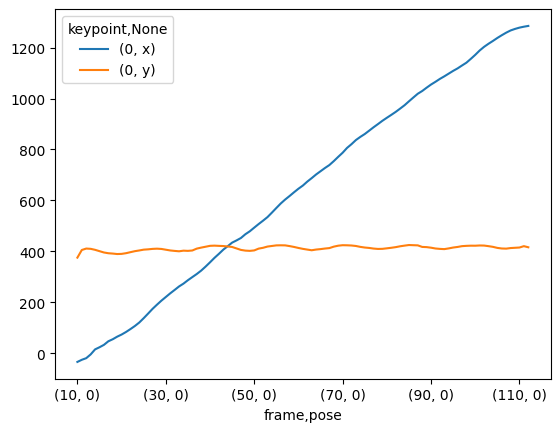

In [11]:
kp0 = dfp.loc[:,pd.IndexSlice[[0],["x", "y"]]]
kp0.plot()

### Calculate pixel speed of keypoint 0 through the video

In [12]:
# get data and shift by one
kp0_shifted = pd.concat([kp0, kp0.shift(1)], axis=1)

def euclidean_distance(x):
    return ((x.iloc[0] - x.iloc[2]) ** 2 + (x.iloc[1] - x.iloc[3]) ** 2) ** 0.5

velocity = kp0_shifted.apply(lambda x: euclidean_distance(x), axis=1).mean() * tracking_data.videoMeta.frameRate

print(f"Velocity in video is {velocity:.0f} pixels per second")

Velocity in video is 404 pixels per second
